### TensorFlow 2 Introduction

In [1]:
import tensorflow as tf

# check to see that we have properly installed tensorflow 2
print(tf.__version__)

2.4.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Data Generation

In [3]:
N_observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(N_observations, 1))
zs = np.random.uniform(-10, 10, (N_observations, 1))
noise = np.random.uniform(-1, 1, (N_observations, 1))

generated_inputs = np.column_stack((xs, zs))
generated_targets = 2 * xs - 3 * zs + 5 + noise

In [4]:
np.savez('./out/TF_intro', inputs=generated_inputs, targets=generated_targets)

### Solving with TensorFlow

In [5]:
training_data = np.load('./out/TF_intro.npz')

In [6]:
input_size = 2
output_size = 1

In [7]:
# in TF2, we must build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                          kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                          bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                         )
])

In [8]:
# original where we use the optimizer from TF without specifying additional parameters
# model.compile(optimizer='sgd', loss='mean_squared_error')

In [9]:
# NEW where we get to set the learning rate
custom_opt_func = tf.keras.optimizers.SGD(learning_rate=0.02)

# NEW change the loss function
# model.compile(optimizer=custom_opt_func, loss='mean_squared_error')
model.compile(optimizer=custom_opt_func, loss='huber_loss')

In [10]:
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 1s - loss: 10.6779
Epoch 2/100
32/32 - 0s - loss: 4.2925
Epoch 3/100
32/32 - 0s - loss: 3.4380
Epoch 4/100
32/32 - 0s - loss: 2.7879
Epoch 5/100
32/32 - 0s - loss: 2.1490
Epoch 6/100
32/32 - 0s - loss: 1.5292
Epoch 7/100
32/32 - 0s - loss: 0.9450
Epoch 8/100
32/32 - 0s - loss: 0.5285
Epoch 9/100
32/32 - 0s - loss: 0.3052
Epoch 10/100
32/32 - 0s - loss: 0.2120
Epoch 11/100
32/32 - 0s - loss: 0.1830
Epoch 12/100
32/32 - 0s - loss: 0.1745
Epoch 13/100
32/32 - 0s - loss: 0.1672
Epoch 14/100
32/32 - 0s - loss: 0.1708
Epoch 15/100
32/32 - 0s - loss: 0.1676
Epoch 16/100
32/32 - 0s - loss: 0.1732
Epoch 17/100
32/32 - 0s - loss: 0.1675
Epoch 18/100
32/32 - 0s - loss: 0.1692
Epoch 19/100
32/32 - 0s - loss: 0.1698
Epoch 20/100
32/32 - 0s - loss: 0.1681
Epoch 21/100
32/32 - 0s - loss: 0.1668
Epoch 22/100
32/32 - 0s - loss: 0.1695
Epoch 23/100
32/32 - 0s - loss: 0.1669
Epoch 24/100
32/32 - 0s - loss: 0.1708
Epoch 25/100
32/32 - 0s - loss: 0.1678
Epoch 26/100
32/32 - 0s - loss: 0

### Extract Weights and Biases

In [11]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9822472],
       [-3.0041096]], dtype=float32)

In [12]:
biases = model.layers[0].get_weights()[1]
biases

array([5.0170074], dtype=float32)

### Make Predictions

In [13]:
model.predict_on_batch(training_data['inputs']).round(2)

array([[ -4.7 ],
       [ 20.03],
       [ 41.01],
       [ -0.17],
       [ 28.04],
       [ 31.36],
       [ 13.24],
       [ 19.58],
       [  6.36],
       [ 41.85],
       [ 25.27],
       [ 19.26],
       [ -5.29],
       [ 22.12],
       [ 14.15],
       [-14.96],
       [ -2.92],
       [ 18.8 ],
       [ 28.4 ],
       [  1.47],
       [ -2.4 ],
       [ 32.16],
       [  8.87],
       [  0.64],
       [ -8.8 ],
       [ 15.22],
       [  3.16],
       [-18.1 ],
       [ -5.14],
       [ 10.25],
       [-13.78],
       [ -9.74],
       [ -6.18],
       [ 41.63],
       [  5.67],
       [ -3.85],
       [  8.95],
       [ 32.91],
       [  2.32],
       [ -9.27],
       [ -8.6 ],
       [ -6.71],
       [-24.16],
       [ 45.79],
       [ -3.45],
       [ 38.67],
       [ 17.15],
       [ 27.28],
       [-13.93],
       [ 21.43],
       [ 33.4 ],
       [ -1.28],
       [ -0.12],
       [ -4.52],
       [-27.56],
       [-31.99],
       [ 11.38],
       [  0.51],
       [  8.53

In [14]:
# optional: compare with our target values
# training_data['targets']

### Plot the Data

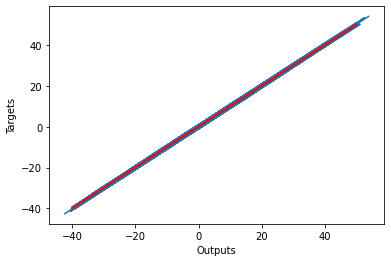

In [15]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),  
         np.squeeze(training_data['targets']))

x45 = [-40, 50]
y45 = [-40, 50]
plt.plot(x45, y45, 'r-', lw=2)

plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()